In [101]:
import pandas as pd

In [102]:
df=pd.read_csv('C:/Users/khush/OneDrive/Desktop/codes/datasets/uber.csv')

In [103]:
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [104]:
df=df.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)

In [105]:
df.shape

(200000, 6)

In [106]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [107]:
set(df.dtypes)


{dtype('int64'), dtype('float64')}

In [108]:
df.dropna()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [109]:
df.isnull().sum()


fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [110]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace=True)


In [111]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)


In [112]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [113]:
import plotly.express as px

In [114]:
fig=px.box(df,y='fare_amount')

In [115]:
fig.show()


In [116]:
x=df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [117]:
df.describe()[['fare_amount', 'passenger_count']]


,fare_amount,passenger_count
count,200000.000000,200000.000000
mean,11.359955,1.684535
std,9.901776,1.385997
min,-52.000000,0.000000
25%,6.000000,1.000000
50%,8.500000,1.000000
75%,12.500000,2.000000
max,499.000000,208.000000


In [118]:
import numpy as np

In [119]:
def remove_outlier(df1 , col):
 Q1 = df1[col].quantile(0.25)
 Q3 = df1[col].quantile(0.75)
 IQR = Q3 - Q1
 lower_whisker = Q1-1.5*IQR
 upper_whisker = Q3+1.5*IQR
 df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
 return df1


In [120]:
def treat_outliers_all(df1 , col_list):
 for c in col_list:
    df1 = remove_outlier(df , c)
 return df1

In [121]:
df = treat_outliers_all(df , df.iloc[: , 0::])

In [122]:
import matplotlib.pyplot as plt

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

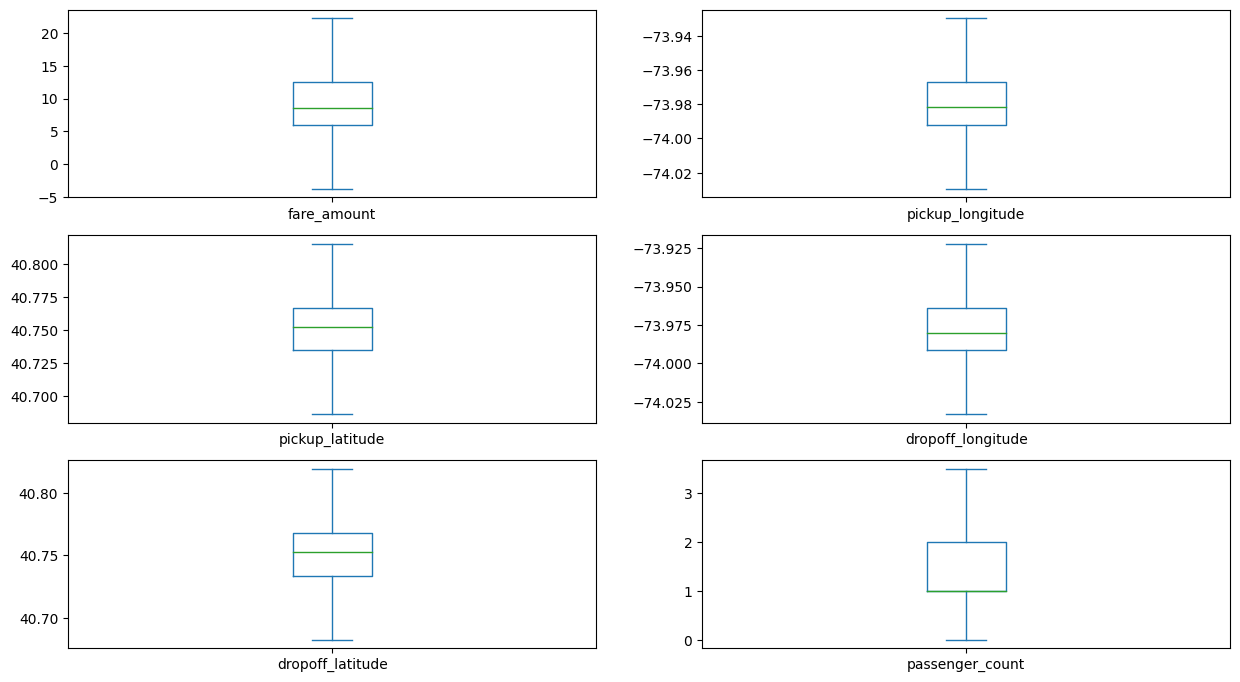

In [123]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [124]:
pip install haversine


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
import haversine as hs

In [130]:
for pos in range(len(df)):
    long1, lati1, long2, lati2 = df['pickup_longitude'][pos], df['pickup_latitude'][pos], df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    c = haversine(loc1, loc2)
    travel_dist.append(c)

NameError: name 'haversine' is not defined

In [ ]:
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()


In [ ]:
#Uber doesn't travel over 130 kms so minimize the distance
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)